In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from google.colab import drive
import numpy as np
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

data = pd.read_csv("/content/drive/My Drive/movies.csv")
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
#importing ratings dataset
data1 = pd.read_csv("/content/drive/My Drive/ratings.csv")
data1.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [6]:
#defining a function for calculating average ratings given by the user for different genres
def get_genre_ratings(data1, data, genres, column_names):
  genre_ratings = pd.DataFrame()
  for genre in genres:
    genre_movies = data[data['genres'].str.contains(genre)]
    avg_genre_votes_per_user = data1[data1['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby('userId').mean()

    genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)

  genre_ratings.columns = column_names
  return genre_ratings

In [7]:
#calculating average genre ratings for "Action" and "comedy" using above defined function
genre_ratings = get_genre_ratings(data1, data, ['Action', 'Comedy'], ['avg_action_rating', 'avg_comedy_rating'])
genre_ratings.head()

,avg_action_rating,avg_comedy_rating
userId,,
1,4.125000,3.869565
2,3.696970,3.317460
3,3.640719,3.454545
4,3.186207,3.611111
5,3.722222,3.571429


In [8]:
# Defining a function to make the average ratings data more suitable for clustering.
# Removing ratings by the people who like both "Action" and "Comedy" genres to make the clustering better

def updated_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
    updated_dataset = genre_ratings[((genre_ratings['avg_action_rating'] < score_limit_1 - 0.2) & (genre_ratings['avg_comedy_rating'] < score_limit_2 - 0.2))] 
    updated_dataset = pd.concat([updated_dataset[:300], genre_ratings.iloc[:2]])
    updated_dataset = pd.DataFrame(updated_dataset.to_records())
    return updated_dataset


In [9]:
#understanding the updated dataset after giving score limits as 3.2,2.5
updated_dataset = updated_genre_rating_dataset(genre_ratings, 3.2, 2.5)

print("Number of records: ", len(updated_dataset))
updated_dataset.head()

Number of records:  302


,userId,avg_action_rating,avg_comedy_rating
0,80,2.62381,2.149171
1,145,2.50000,1.378788
2,181,1.78270,1.563679
3,194,2.18750,2.125000
4,313,2.75000,2.074074


In [10]:
#Defining a function to plot a scatter plot

def draw_scatterplot(x_data, x_label, y_data, y_label):
  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(111)

  plt.xlim(0,5)
  plt.ylim(0,5)
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
  ax.scatter(x_data,y_data, s=30)

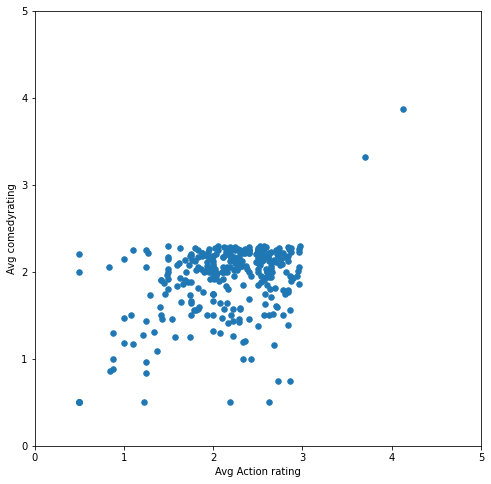

In [11]:
#plotting scatter plot using above function for updated dataset
draw_scatterplot(updated_dataset['avg_action_rating'], 'Avg Action rating', updated_dataset['avg_comedy_rating'], 'Avg comedyrating')

In [12]:
#Turning the updated dataset into a list for making it suitable for 'KMeans'
X = updated_dataset[['avg_action_rating', 'avg_comedy_rating']].values

In [13]:
#defining K-Means function with 2 cluster 

kmeans_1 = KMeans(n_clusters=2)
predictions = kmeans_1.fit_predict(X)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
#Defining a function for drawing clusters 
def draw_clusters(updated_dataset, predictions, cmap='viridis'):
  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(111)
  plt.xlim(0,5)
  plt.ylim(0,5)
  ax.set_xlabel('Avg action rating')
  ax.set_ylabel('Avg comedy rating')
  clustered = pd.concat([updated_dataset.reset_index(), pd.DataFrame({'group': predictions})], axis = 1)
  plt.scatter(clustered['avg_comedy_rating'], clustered['avg_action_rating'], c=clustered['group'], s=20, cmap=cmap)


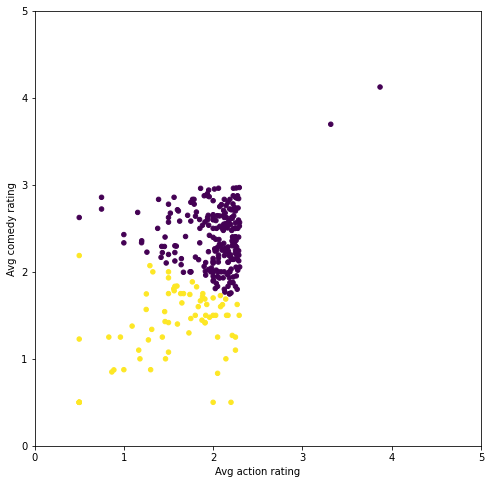

In [15]:
draw_clusters(updated_dataset, predictions)

In [16]:
#identifying the clustering errors and finding the ideal value for number of clusters 'k'
#defining a function to find clustering errors
df = updated_dataset[['avg_action_rating', 'avg_comedy_rating']]
def clustering_errors(k, df):
  kmeans = KMeans(n_clusters=k).fit(df)
  predictions = kmeans.predict(df)
  silhouette_avg = silhouette_score(df, predictions)
  return silhouette_avg

In [17]:
possible_k_values = range(2, len(X)+1, 5)
errors_per_k = [clustering_errors(k,X) for k in possible_k_values]

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

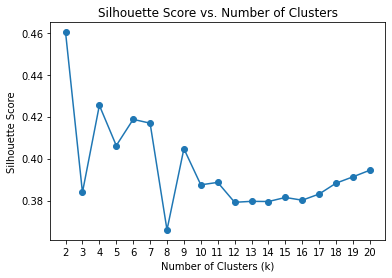

In [23]:
possible_k_values = np.arange(2, 21, 1)
errors_per_k = [clustering_errors(k, df) for k in possible_k_values]

plt.plot(possible_k_values, errors_per_k, 'o-')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

# Set ticks manually
plt.xticks(possible_k_values)

plt.show()


In [24]:
#as per the graph the ideal 'k' value is 2 and hence keeping the 2 clusters that formed earlier. 
#Conclusion#
# As the clusters have been formed toeards the left side of the graph, which indicates that the action movie genres are rated less score when compared to the comedy genre movies.